# Index ordering in Numpy

When using multidimensional arrays, it is very important to understand the order of the indices, and how they are interpreted by different modules. 

## Index order of 2D arrays
The indices of 2-D arrays are ordered in the same way as matrix indices are. Example:

In [1]:
import numpy as np
m = np.array([[1,2,3],[4,5,6]])
m

array([[1, 2, 3],
       [4, 5, 6]])

In [2]:
m[1,0]

4

The first index (here set to 1) counts rows (i.e. it counts from top to bottom). The second index (here set to 0) counts columns (i.e. it counts from left to right). This is exactly the way it is done with matrices.

Note that we can regard the above matrix as a set of rows:

In [4]:
m[1]

array([4, 5, 6])

We can thus also get element `[1,0]` by first extracting the row, then extracting the column:

In [5]:
m[1][0]

4

In [6]:
row=m[1]
row[0]

4

But when we want to slice, there can be confusing things happening:

In [7]:
m[:,0]

array([1, 4])

In [8]:
m[:][0]

array([1, 2, 3])

Any idea why these two ways of slicing give different results?

## What index order _really_ does (inner and outer indices)
The above `m[1][0]` interpretation of a 2D array also is related to the concept of "inner index" and "outer index". What does that mean? The point is that a 2D array is, in computer memory, in fact a 1D array. It is merely _interpreted_ as a 2D array. The way to see this is like this:

In [36]:
mflat = m.flatten()
mflat

array([1, 2, 3, 4, 5, 6])

The 'flattened' array is the _actual_ array as it is in memory. You see that the rows are concatenated after each other. You can addess the element `m[ivert,ihori]` also directly in `mflat`:

In [39]:
ivert, ihori = 1,0
print(m[ivert,ihori])
print(mflat[ivert*3+ihori])

4
4


Given that `mflat` is the _actual_ array (below the surface, so to speak), the 2-D array is just a _shape_ given to that array. With `reshape()` we can change the shape of this dataset:

In [43]:
malt = m.reshape(3,2)
malt

array([[1, 2],
       [3, 4],
       [5, 6]])

Note that this is different from the transpose:

In [44]:
m.T

array([[1, 4],
       [2, 5],
       [3, 6]])

## Index order in maps and images
Another confusing thing can be when we make 2D arrays as maps in an x-y plane. Let's make such a map and see what happens:

In [32]:
x=np.linspace(-1,1,40)
y=np.linspace(-0.5,0.5,20)
xx,yy=np.meshgrid(x,y)
ff=np.cos(xx*7.5)*np.exp(-0.5*((yy-0.25)/0.15)**2)

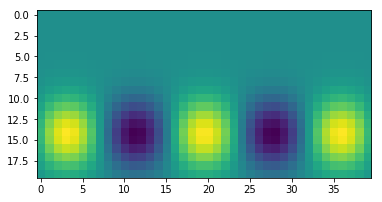

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(ff)

First note, that the y-axis goes from top to bottom (just like with a matrix). This is also how the old-fashioned TV set worked: an electron beam went from left to right (rows), and then from top to bottom. It is also the way we read a book. But it is not how mathematians make a figure: we tend to put the y-axis from bottom to top. You can set this with `origin='lower'`:

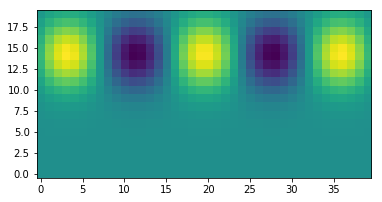

In [34]:
plt.imshow(ff,origin='lower')

Now let's have a closer look at the index order:

In [35]:
ff.shape

(20, 40)

As you can see by the outcome of `ff.shape`: The x-index (which has 40 elements) is right, the y-index (which has 20 elements) is left. So the index-order is `ff[index_y,index_x]`, i.e. (y,x). This can be confusing, because in mathematics we are used to set the order to (x,y). But from the python perspective this makes sense: x is the "inner index" and y is the "outer index".

So the _index ordering_ is y,x, but the _order of the arguments_ for `np.meshgrid()` are x,y (opposite). 

You can, **if you like**, force meshgrid to set the index order also to x,y:

In [47]:
xx,yy=np.meshgrid(x,y,indexing='ij')
ff=np.cos(xx*7.5)*np.exp(-0.5*((yy-0.25)/0.15)**2)

In [48]:
ff.shape

(40, 20)

But then you have to be careful when using `imshow()`: You now have to use the transpose:

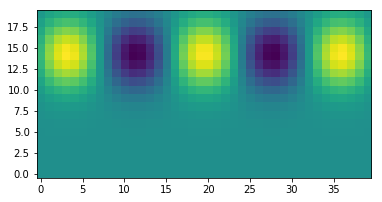

In [51]:
plt.imshow(ff.T,origin='lower')

## 3-D arrays with np.meshgrid()

In [52]:
x=np.linspace(-1,1,40)
y=np.linspace(-0.5,0.5,20)
z=np.linspace(0,3,10)
xx,yy,zz=np.meshgrid(x,y,z)
ff=np.cos(xx*7.5)*np.exp(-0.5*((yy-0.25)/0.15)**2)*np.exp(-zz)

In [53]:
ff.shape

(20, 40, 10)

Now things get _really_ confusing! As you see, the index order is now: y,x,z, while the argument order to `meshgrid()` remains x,y,z.

Therefore, for 3-D and higher-dimensional arrays, I recommend always to use `indexing='ij'`! 